In [33]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import statsmodels.api as sm

data = pd.read_csv("soccer.csv") 
# Preview the first 5 lines of the loaded data 

In [34]:
data

Observation   Odds  Ranking Difference  Home(1) / Away(0)  \
0             Caen 20   3.60                 -14                  1   
1            Lille 20   2.20                  14                  0   
2            Paris 20   1.20                  16                  0   
3      Montpellier 20   2.20                  13                  0   
4             Lyon 20   1.45                   8                  1   
5        Marseille 20   1.75                  13                  1   
6    Saint-Etienne 20   2.75                  16                  0   
7             Nice 20   2.60                   5                  1   
8            Nimes 20   2.20                   5                  1   
9       Strasbourg 20   3.50                   6                  0   
10        Bordeaux 20   2.90                  -5                  0   
11           Reims 20   6.50                  -8                  0   
12          Nantes 20   2.70                  -4                  1   
13          Rennes 20   2.70                   4                  0   
14          Angers 20   3.50                  -5                  0   
15        Toulouse 20   2.15                  -6                  1   
16           Dijon 20   3.25                 -13                  1   
17          Monaco 20   3.90                 -13                  0   
18          Amiens 20  13.00                 -16                  1   
19        Guingamp 20   2.70                 -16                  1   
20           Paris 21   1.05                  19                  1   
21           Lille 21   1.60                  15                  1   
22   Saint-Etienne 21   3.40                   1                  1   
23            Lyon 21   2.05                  -1                  0   
24     Montpellier 21   3.90                   4                  0   
25       Marseille 21   1.75                  10                  0   
26            Nice 21   3.70                   4                  0   
27      Strasbourg 21   4.25                  11                  0   
28          Rennes 21   2.00                  -4                  1   
29           Nimes 21   1.95                   4                  1   
..                ...    ...                 ...                ...   
110          Nimes 25   1.95                   6                  1   
111         Angers 25   2.00                  -5                  1   
112       Bordeaux 25   2.05                   2                  1   
113         Nantes 25   4.75                   4                  0   
114       Toulouse 25   4.00                  -2                  0   
115         Amiens 25   9.00                 -10                  0   
116          Dijon 25   3.80                  -6                  0   
117         Monaco 25   1.75                  -4                  1   
118           Caen 25   3.20                 -10                  1   
119       Guingamp 25  13.00                 -17                  0   
120          Paris 26   1.20                   9                  1   
121          Lille 26   2.60                   7                  0   
122           Lyon 26   2.37                  13                  0   
123      Marseille 26   2.60                   7                  0   
124  Saint-Etienne 26   2.25                  13                  0   
125    Montpellier 26   2.05                   1                  1   
126          Reims 26   4.20                  -1                  0   
127           Nice 26   3.00                   9                  0   
128     Strasbourg 26   2.90                  -7                  1   
129          Nimes 26  13.00                  -9                  0   
130         Rennes 26   2.80                  -7                  1   
131         Angers 26   3.00                   8                  0   
132       Bordeaux 26   3.75                   1                  0   
133         Nantes 26   2.10                  -1                  1   
134       Toulouse 26   1.72      

# Multivariate Regression

In [46]:
y = data['Odds']
X = data[['Ranking Difference','Home(1) / Away(0)','Team Value (in millions of euros)','Points earned in last five games','Win the last confrontation (Win=1, Not a win=0)','Loss in the last confrontation (Loss =1, Not a loss = 0)','Overall Ranking']]
regr = linear_model.LinearRegression()
regr.fit(X, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 3.686281109870118
Coefficients: 
 [-0.18555697 -1.92951064 -0.00291836  0.13974314  0.84377892  1.0328166
 -0.04555821]


# Odds vs Ranking

Text(0.5,1,'Odds vs Team Value (in millions of euros)')

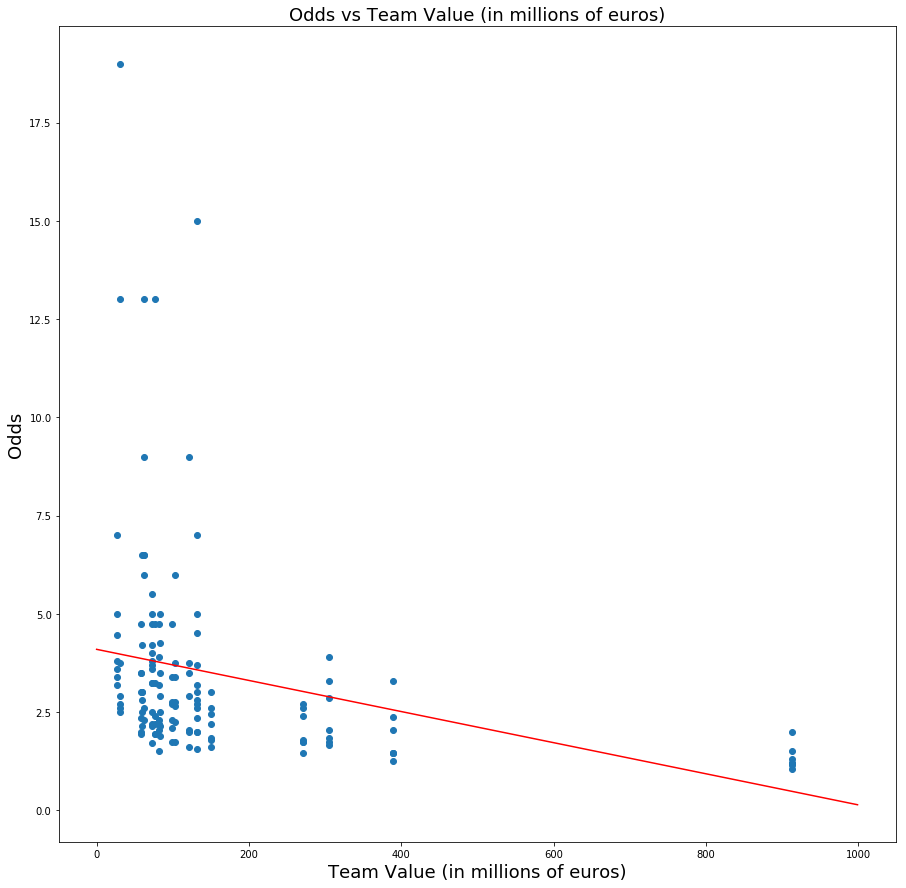

In [48]:
real_data=data[['Odds','Ranking Difference','Home(1) / Away(0)','Team Value (in millions of euros)','Points earned in last five games','Win the last confrontation (Win=1, Not a win=0)','Loss in the last confrontation (Loss =1, Not a loss = 0)','Overall Ranking']]
x1 = X[['Team Value (in millions of euros)']]
regr1 = sm.OLS(y,sm.add_constant(x1)).fit()
line_x = np.arange(0,1000)
line_y = regr1.params[1] * line_x + regr1.params[0]
fig1 = plt.figure(figsize=(15,15))
plt.scatter(x1,y)
plt.plot(line_x,line_y,'r')
plt.xlabel('Team Value (in millions of euros)', fontsize=18)
plt.ylabel('Odds', fontsize=18)
plt.title('Odds vs Team Value (in millions of euros)', fontsize=18)

In [49]:
regr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Odds   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     13.04
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           0.000425
Time:                        16:31:37   Log-Likelihood:                -327.63
No. Observations:                 140   AIC:                             659.3
Df Residuals:                     138   BIC:                             665.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 4.0962      0.278     14.743      0.000       3.547       4.646
Team Value (in millions of euros)    -0.0040      0.001     -3.612      0.000      -0.006      -0.002
==============================================================================
Omnibus:                      126.024   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.757
Skew:                           3.332   Prob(JB):                    1.57e-282
Kurtosis:                      16.344   Cond. No.                         329.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Odds vs Ranking Difference

Text(0.5,1,'Odds vs Ranking Difference')

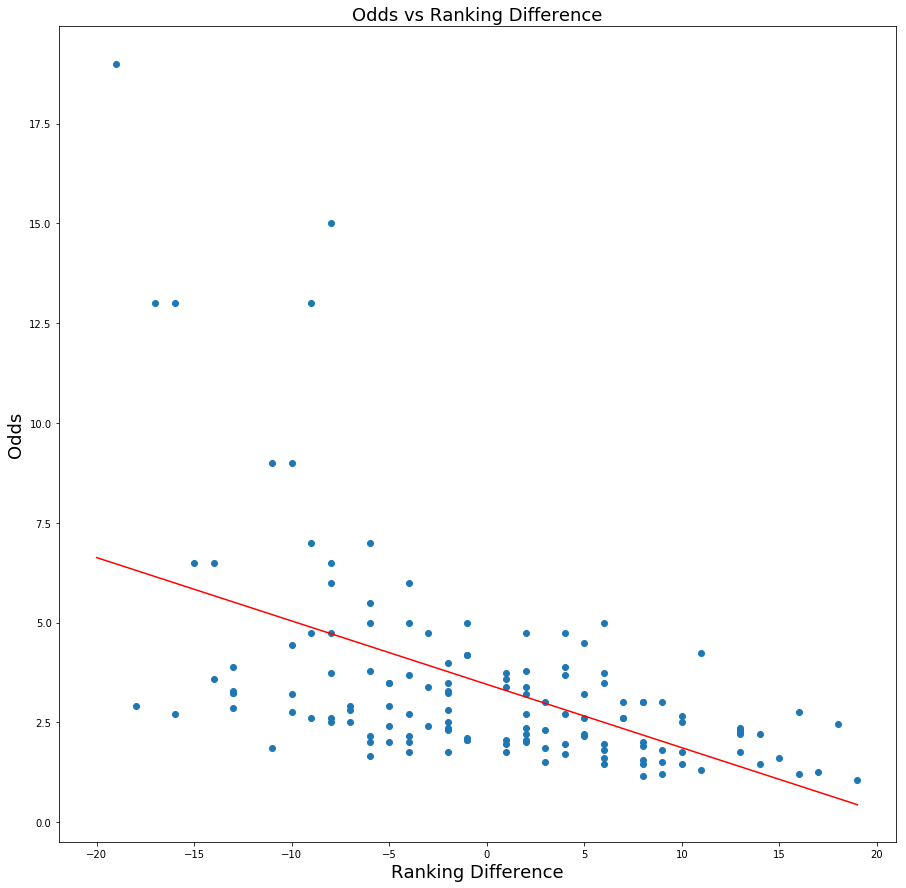

In [50]:
x2 = X[['Ranking Difference']]
regr2 = sm.OLS(y,sm.add_constant(x2)).fit()
line_x = np.arange(-20,20)
line_y = regr2.params[1] * line_x + regr2.params[0]
fig1 = plt.figure(figsize=(15,15))
plt.scatter(x2,y)
plt.plot(line_x,line_y,'r')
plt.xlabel('Ranking Difference', fontsize=18)
plt.ylabel('Odds', fontsize=18)
plt.title('Odds vs Ranking Difference', fontsize=18)

In [51]:
regr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Odds   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     49.43
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           8.68e-11
Time:                        16:31:42   Log-Likelihood:                -312.52
No. Observations:                 140   AIC:                             629.0
Df Residuals:                     138   BIC:                             634.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.4546      0.192     17.993      0.000       3.075       3.834
Ranking Difference    -0.1587      0.023     -7.030      0.000      -0.203      -0.114
==============================================================================
Omnibus:                       99.747   Durbin-Watson:                   2.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.094
Skew:                           2.544   Prob(JB):                    1.42e-155
Kurtosis:                      12.816   Cond. No.                         8.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Odd vs Home(1) / Away(0)

Text(0.5,1,'Odds vs Home(1) / Away(0)')

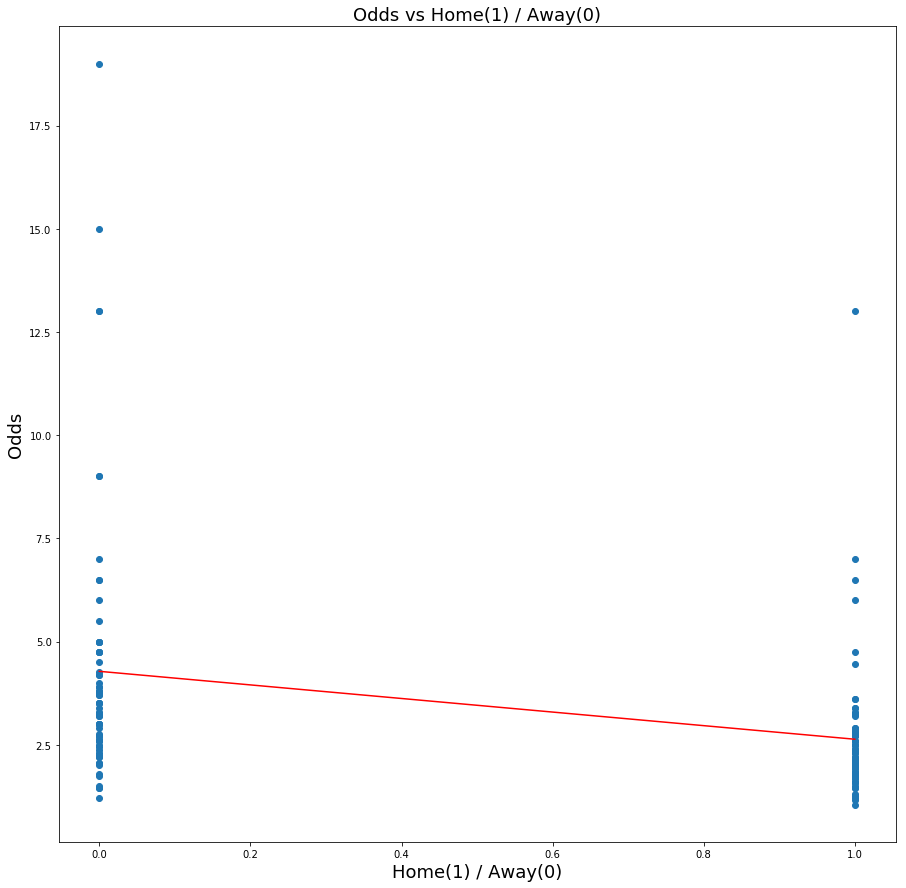

In [52]:
x3 = X[['Home(1) / Away(0)']]
regr3 = sm.OLS(y,sm.add_constant(x3)).fit()
line_x = np.arange(0,2)
line_y = regr3.params[1] * line_x + regr3.params[0]
fig1 = plt.figure(figsize=(15,15))
plt.scatter(x3,y)
plt.plot(line_x,line_y,'r')
plt.xlabel('Home(1) / Away(0)', fontsize=18)
plt.ylabel('Odds', fontsize=18)
plt.title('Odds vs Home(1) / Away(0)', fontsize=18)

In [53]:
regr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Odds   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     14.98
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           0.000167
Time:                        16:31:46   Log-Likelihood:                -326.73
No. Observations:                 140   AIC:                             657.5
Df Residuals:                     138   BIC:                             663.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.2783      0.301     14.235      0.000       3.684       4.873
Home(1) / Away(0)    -1.6451      0.425     -3.871      0.000      -2.486      -0.805
==============================================================================
Omnibus:                      122.604   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1195.789
Skew:                           3.228   Prob(JB):                    2.18e-260
Kurtosis:                      15.780   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Odds vs Points earned on last five games

Text(0.5,1,'Odds vs Points earned on last five games')

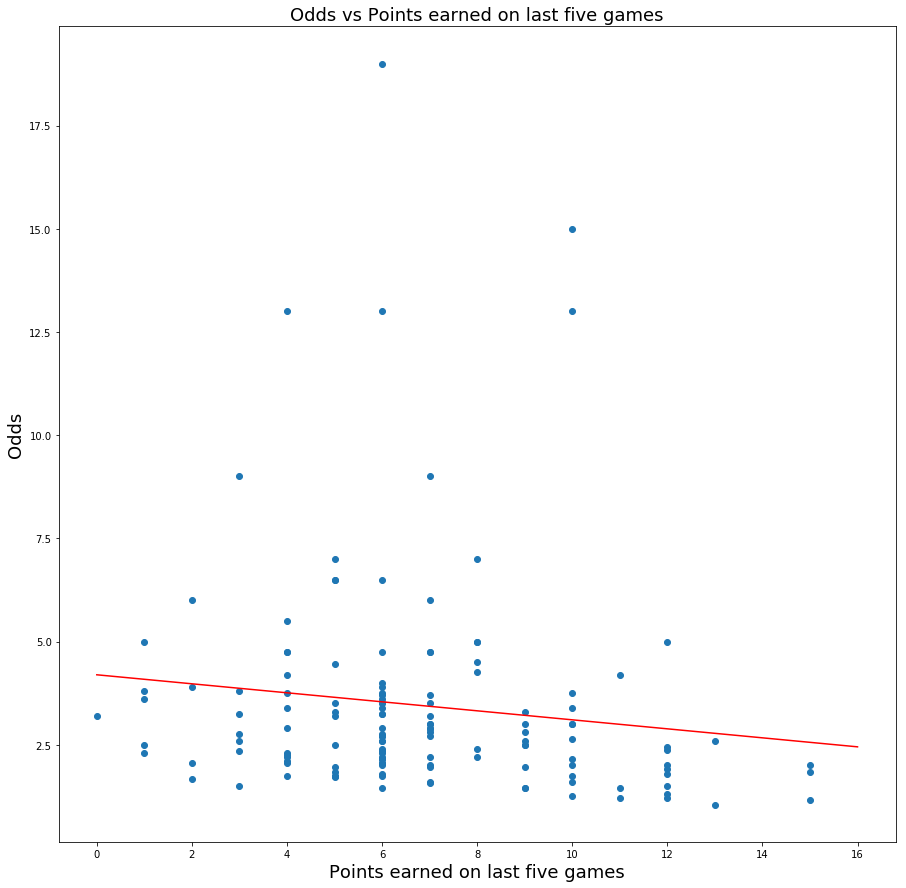

In [56]:
x4 = X[['Points earned in last five games']]
regr4 = sm.OLS(y,sm.add_constant(x4)).fit()
line_x = np.arange(0,17)
line_y = regr4.params[1] * line_x + regr4.params[0]
fig1 = plt.figure(figsize=(15,15))
plt.scatter(x4,y)
plt.plot(line_x,line_y,'r')
plt.xlabel('Points earned on last five games', fontsize=18)
plt.ylabel('Odds', fontsize=18)
plt.title('Odds vs Points earned on last five games', fontsize=18)

In [57]:
regr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Odds   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.301
Date:                Tue, 19 Nov 2019   Prob (F-statistic):              0.132
Time:                        16:32:18   Log-Likelihood:                -332.79
No. Observations:                 140   AIC:                             669.6
Df Residuals:                     138   BIC:                             675.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                4.1944      0.535      7.837      0.000       3.136       5.253
Points earned in last five games    -0.1091      0.072     -1.517      0.132      -0.251       0.033
==============================================================================
Omnibus:                      125.854   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1276.560
Skew:                           3.335   Prob(JB):                    6.29e-278
Kurtosis:                      16.204   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Odds vs Win the last confrontation (Win=1, Not a win=0)

Text(0.5,1,'Odds vs Win the last confrontation (Win=1, Not a win=0)')

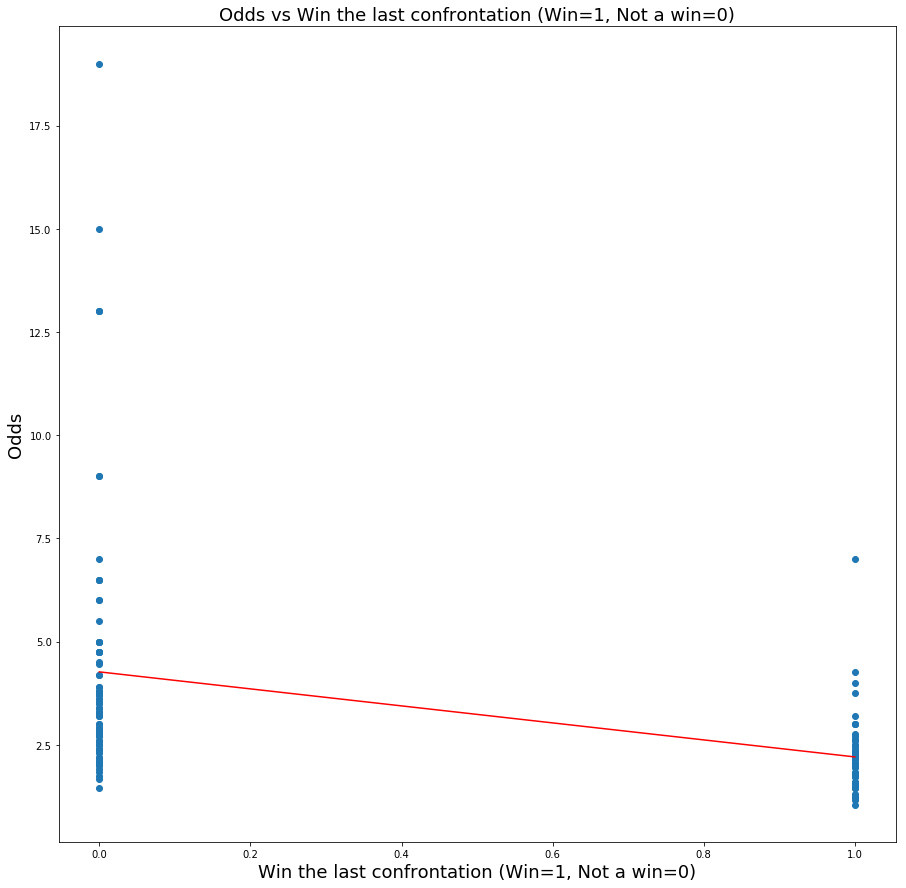

In [58]:
x5 = X[['Win the last confrontation (Win=1, Not a win=0)']]
regr5 = sm.OLS(y,sm.add_constant(x5)).fit()
line_x = np.arange(0,2)
line_y = regr5.params[1] * line_x + regr5.params[0]
fig1 = plt.figure(figsize=(15,15))
plt.scatter(x5,y)
plt.plot(line_x,line_y,'r')
plt.xlabel('Win the last confrontation (Win=1, Not a win=0)', fontsize=18)
plt.ylabel('Odds', fontsize=18)
plt.title('Odds vs Win the last confrontation (Win=1, Not a win=0)', fontsize=18)

In [59]:
regr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Odds   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     23.69
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           3.05e-06
Time:                        16:32:24   Log-Likelihood:                -322.86
No. Observations:                 140   AIC:                             649.7
Df Residuals:                     138   BIC:                             655.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               4.2651      0.265     16.077      0.000       3.741       4.790
Win the last confrontation (Win=1, Not a win=0)    -2.0601      0.423     -4.867      0.000      -2.897      -1.223
==============================================================================
Omnibus:                      124.994   Durbin-Watson:                   2.304
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1308.995
Skew:                           3.280   Prob(JB):                    5.69e-285
Kurtosis:                      16.467   Cond. No.                         2.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Odds vs Loss in the last confrontation (Loss =1, Not a loss = 0)

Text(0.5,1,'Odds vs Loss in the last confrontation (Loss =1, Not a loss = 0)')

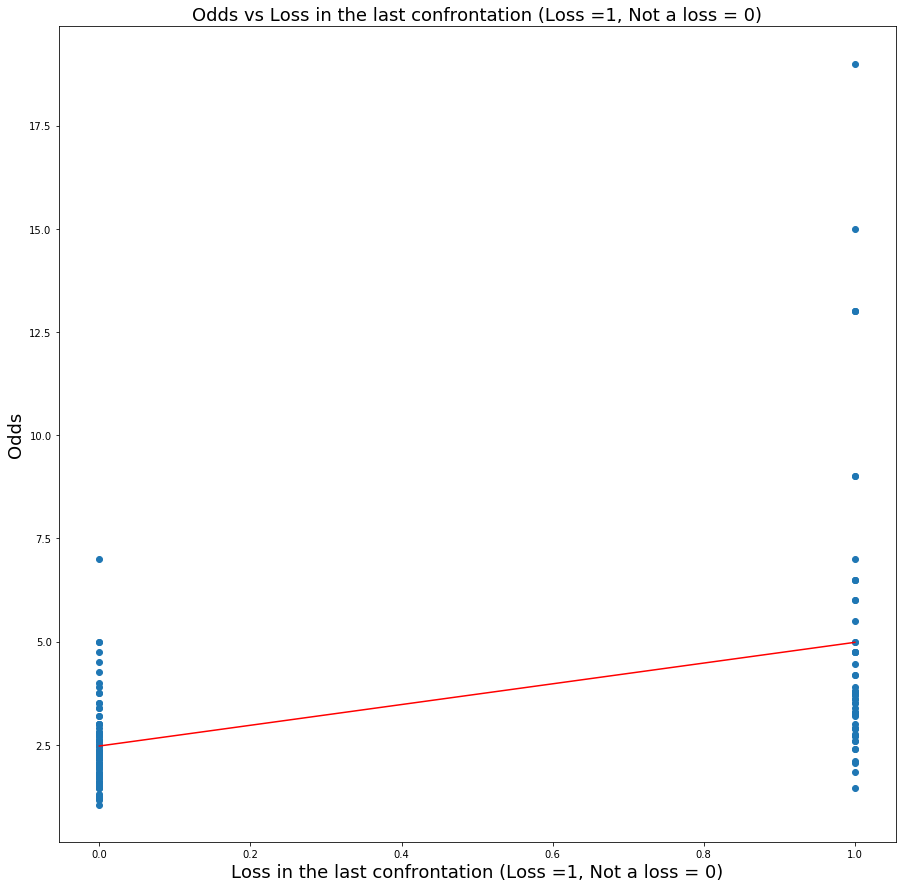

In [60]:
x6 = X[['Loss in the last confrontation (Loss =1, Not a loss = 0)']]
regr6 = sm.OLS(y,sm.add_constant(x6)).fit()
line_x = np.arange(0,2)
line_y = regr6.params[1] * line_x + regr6.params[0]
fig1 = plt.figure(figsize=(15,15))
plt.scatter(x6,y)
plt.plot(line_x,line_y,'r')
plt.xlabel('Loss in the last confrontation (Loss =1, Not a loss = 0)', fontsize=18)
plt.ylabel('Odds', fontsize=18)
plt.title('Odds vs Loss in the last confrontation (Loss =1, Not a loss = 0)', fontsize=18)

In [65]:
regr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Odds   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     38.40
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           6.23e-09
Time:                        16:34:33   Log-Likelihood:                -316.76
No. Observations:                 140   AIC:                             637.5
Df Residuals:                     138   BIC:                             643.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                        2.4692      0.254      9.722      0.000       1.967       2.971
Loss in the last confrontation (Loss =1, Not a loss = 0)     2.5112      0.405      6.197      0.000       1.710       3.312
==============================================================================
Omnibus:                      116.614   Durbin-Watson:                   2.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1110.929
Skew:                           3.007   Prob(JB):                    5.82e-242
Kurtosis:                      15.421   Cond. No.                         2.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Odds vs Overall Ranking

Text(0.5,1,'Odds vs Overall Ranking')

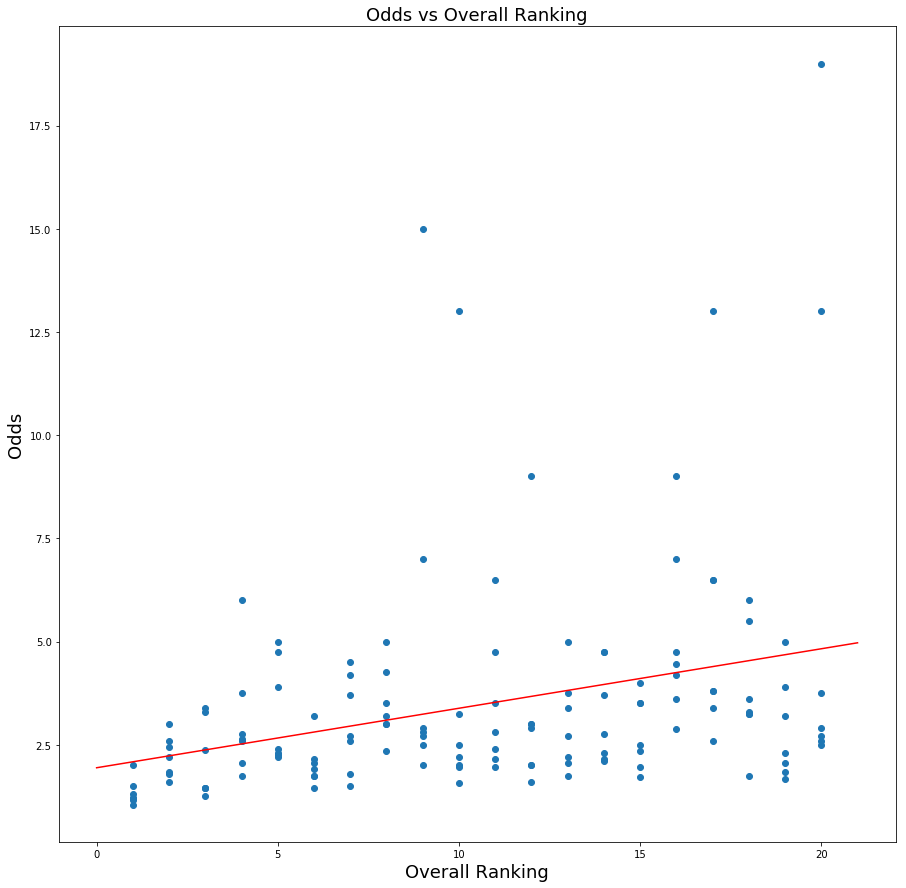

In [66]:
x7 = X[['Overall Ranking']]
regr7 = sm.OLS(y,sm.add_constant(x7)).fit()
line_x = np.arange(0,22)
line_y = regr7.params[1] * line_x + regr7.params[0]
fig1 = plt.figure(figsize=(15,15))
plt.scatter(x7,y)
plt.plot(line_x,line_y,'r')
plt.xlabel('Overall Ranking', fontsize=18)
plt.ylabel('Odds', fontsize=18)
plt.title('Odds vs Overall Ranking', fontsize=18)

In [67]:
regr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Odds   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     15.33
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           0.000141
Time:                        16:34:39   Log-Likelihood:                -326.58
No. Observations:                 140   AIC:                             657.2
Df Residuals:                     138   BIC:                             663.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.9424      0.441      4.405      0.000       1.070       2.814
Overall Ranking     0.1441      0.037      3.915      0.000       0.071       0.217
==============================================================================
Omnibus:                      117.791   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.230
Skew:                           3.094   Prob(JB):                    3.95e-228
Kurtosis:                      14.884   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Correlation Check

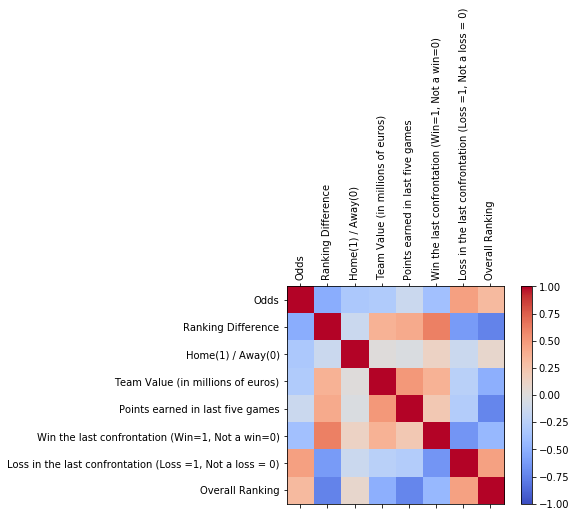

In [62]:
corr = real_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(real_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(real_data.columns)
ax.set_yticklabels(real_data.columns)
plt.show()

As shown in the correlation figure, the "Ranking Difference" variable has least correlation with Odds. 

So, without "Ranking Difference" variable, the multivariate regression is:

In [17]:
y = data['Odds']
X = data[['Ranking','Home(1) / Away(0)','Points earned on last five games','Win the last confrontation (Win=1, Not a win=0)','Loss in the last confrontation (Loss =1, Not a loss = 0)']]
regr = linear_model.LinearRegression()
regr.fit(X, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 -1.0876182445598954
Coefficients: 
 [ 0.31175923 -2.18330278  0.29312976  0.67016418  0.68992553]
R^2: 
 <bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>
